In [159]:
%matplotlib inline

In [160]:
#quote examples from kaggle  
#https://www.kaggle.com/malais/titanic/kaggle-first-ipythonnotebook/run/96456/notebook 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import linear_model as lm
from sklearn import ensemble


In [161]:
train = pd.read_csv("titanic_data.csv",dtype={'Age':np.float64})
train.head()
#train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [162]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [163]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [164]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [165]:
train['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [166]:
train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [167]:
train['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [168]:
train = train.drop(['Ticket','Cabin'],axis=1)
train = train.dropna()

In [169]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x05D67468> (for post_execute):


MemoryError: In RendererAgg: Out of memory

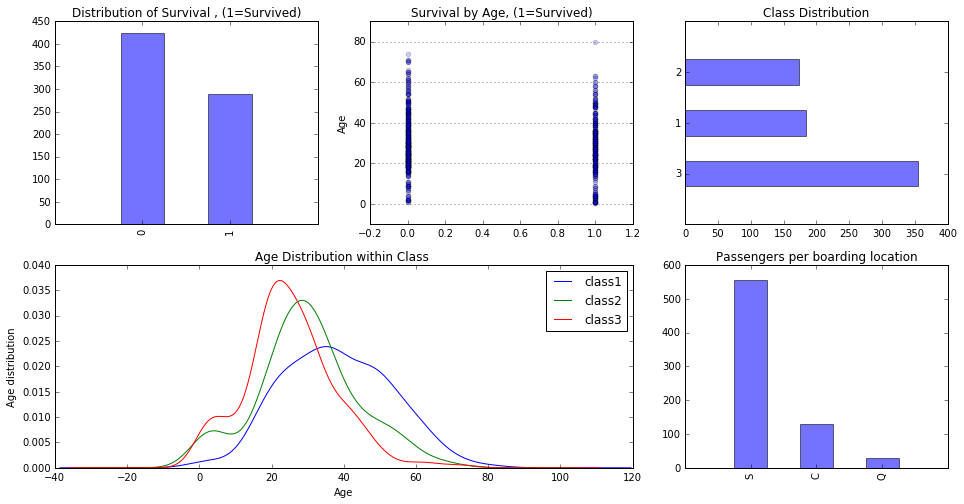

In [68]:
#specifies parameters of our figure
fig = plt.figure(figsize = (16,8),dpi = 1600)
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

#plot subplot together
ax1 = plt.subplot2grid((2,3),(0,0))
#plot a bar chart to display which are survived and which are not
train.Survived.value_counts().plot(kind = 'bar',alpha = alpha_bar_chart)
#set the x-axis margin
ax1.set_xlim(-1,2)
#set titles
plt.title("Distribution of Survival , (1=Survived)")

#plot Age scatterplot
ax2 = plt.subplot2grid((2,3),(0,1))
plt.scatter(train.Survived,train.Age,alpha = alpha_scatterplot)
plt.grid(b = True, which = 'major',axis = 'y')
plt.ylabel('Age')
plt.title('Survival by Age, (1=Survived)')

#plot Pclass distribution
ax3 = plt.subplot2grid((2,3),(0,2))
train.Pclass.value_counts().plot(kind = 'barh',alpha = alpha_bar_chart)
ax3.set_ylim(-1,len(train.Pclass.value_counts()))
plt.title("Class Distribution")

# plots a kernel desnsity estimate of the subset of the 1st class passanges's age
ax4 = plt.subplot2grid((2,3),(1,0),colspan = 2)
train.Age[train.Pclass == 1].plot(kind = 'kde')
train.Age[train.Pclass == 2].plot(kind = 'kde')
train.Age[train.Pclass == 3].plot(kind = 'kde')
plt.xlabel('Age')
plt.legend(('class1','class2','class3'),loc = 'best')
plt.title("Age Distribution within Class ")
plt.ylabel('Age distribution')

#plot Embarked
ax5 = plt.subplot2grid((2,3),(1,2))
train.Embarked.value_counts().plot(kind = 'bar',alpha = alpha_bar_chart)
ax5.set_xlim(-1,len(train.Embarked.value_counts()))
plt.title("Passengers per boarding location")



In [ ]:
fig = plt.figure(figsize = (18,6))
# create a plot of two subsets, male and female, of the survived variable.
# After we do that we call value_counts() so it can be easily plotted as a bar graph. 
# 'barh' is just a horizontal bar graph
ax1 = fig.add_subplot(121)
train.Survived[train.Sex == 'male'].value_counts().plot(kind = 'barh',label = 'Male')
train.Survived[train.Sex == 'female'].value_counts().plot(kind = 'barh',color = '#FA2379',label = 'Female')
ax1.set_ylim(-1,2)
plt.legend(loc = 'best')
plt.title("Who Survived? with respect to Gender, (raw value counts) ")

ax2 = fig.add_subplot(122)
(train.Survived[train.Sex == 'male'].value_counts()/float(train.Sex[train.Sex == 'male'].size)).plot(kind = 'barh',label = 'Male')
(train.Survived[train.Sex == 'female'].value_counts()/float(train.Sex[train.Sex == 'male'].size)).plot(kind = 'barh',color = '#FA2379',label = 'Female')
plt.title("Who Survived Proportionally ? with respect to Gender, (raw value counts) ")                                                                                                       

In [ ]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
female_highclass = train.Survived[train.Sex == 'female'][train.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = train.Survived[train.Sex == 'female'][train.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = train.Survived[train.Sex == 'male'][train.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = train.Survived[train.Sex == 'male'][train.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

In [170]:
train = train.drop(['PassengerId','Name'],axis = 1)


In [171]:
train['Pclass'] = train['Pclass'].astype(object)
train['Survived'] = train['Survived'].astype(int)

In [172]:
train.dtypes

Survived      int32
Pclass       object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [173]:
'''
pandas.get_dummies() Convert categorical variable into dummy/indicator variables
pd.get_dummies(df, prefix=['col1', 'col2'])
   C  col1_a  col1_b  col2_a  col2_b  col2_c
0  1       1       0       0       1       0
1  2       0       1       1       0       0
2  3       1       0       0       0       1
'''
pclass_frame = pd.get_dummies(train['Pclass'],prefix = 'Class')
pclass_frame.dtypes
pclass_frame.head()

,Class_1,Class_2,Class_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [174]:
pclass_frame = pclass_frame.drop(['Class_3'],axis = 1)
train = train.join(pclass_frame)

In [175]:
#nothing

In [176]:
sex_frame = pd.get_dummies(train['Sex'])
sex_frame = sex_frame.drop(['male'],axis = 1)
train = train.join(sex_frame)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Class_1,Class_2,female
0,0,3,male,22,1,0,7.2500,S,0,0,0
1,1,1,female,38,1,0,71.2833,C,1,0,1
2,1,3,female,26,0,0,7.9250,S,0,0,1
3,1,1,female,35,1,0,53.1000,S,1,0,1
4,0,3,male,35,0,0,8.0500,S,0,0,0


In [177]:

train = train.drop(['Sex','Pclass','Embarked'],axis = 1)

In [178]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Class_1,Class_2,female
0,0,22,1,0,7.2500,0,0,0
1,1,38,1,0,71.2833,1,0,1
2,1,26,0,0,7.9250,0,0,1
3,1,35,1,0,53.1000,1,0,1
4,0,35,0,0,8.0500,0,0,0


In [179]:
labels = train.Survived.values
print(labels)

[0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0
 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0
 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1
 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1
 0 0 1 0 0 1 0 0 1 1 0 0 

In [180]:
train = train.drop(['Survived'],axis = 1)


In [181]:
train_Array = train.ix[:,:]
print(train_Array)

     Age  SibSp  Parch      Fare  Class_1  Class_2  female
0     22      1      0    7.2500        0        0       0
1     38      1      0   71.2833        1        0       1
2     26      0      0    7.9250        0        0       1
3     35      1      0   53.1000        1        0       1
4     35      0      0    8.0500        0        0       0
6     54      0      0   51.8625        1        0       0
7      2      3      1   21.0750        0        0       0
8     27      0      2   11.1333        0        0       1
9     14      1      0   30.0708        0        1       1
10     4      1      1   16.7000        0        0       1
11    58      0      0   26.5500        1        0       1
12    20      0      0    8.0500        0        0       0
13    39      1      5   31.2750        0        0       0
14    14      0      0    7.8542        0        0       1
15    55      0      0   16.0000        0        1       1
16     2      4      1   29.1250        0        0      

In [182]:
clf = ensemble.RandomForestClassifier(n_jobs = -1,n_estimators = 1000)
clf.fit(train_Array , labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [183]:
logreg = lm.LogisticRegression(C = 1e5)
logreg.fit(train_Array,labels)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [184]:
test = pd.read_csv('test.csv',dtype = {'Age':np.float64},)

In [185]:
train.dtypes

Age        float64
SibSp        int64
Parch        int64
Fare       float64
Class_1    float64
Class_2    float64
female     float64
dtype: object

In [186]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [187]:
predictors = ['Age','SibSp','Parch','Fare','Class_1','Class_2','female']

In [188]:
test_sex_frame = pd.get_dummies(test['Sex'])
test_sex_frame = test_sex_frame.drop(['male'],axis = 1)
test = test.join(test_sex_frame)
test_class_frame = pd.get_dummies(test['Pclass'],prefix = 'Class')
test_class_frame = test_class_frame.drop(['Class_3'],axis = 1)
test = test.join(test_class_frame)


In [190]:
test = test.drop(['Pclass','Sex'],axis = 1)

In [191]:
test = test.fillna(0)
test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,Class_1,Class_2
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,Q,0,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,S,1,0,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,Q,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,S,0,0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,S,1,0,0


In [192]:
predicted_probability = logreg.predict(test[predictors])

In [193]:
predicted_probability

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0,

In [195]:
# Create a new dataframe with only the columns Kaggle wants from the dataset.
Submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predicted_probability})
Submission.to_csv("malai_submission.csv",index = False)

In [196]:
#source url :
#https://www.kaggle.com/malais/titanic/kaggle-first-ipythonnotebook/run/96456/notebook